# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [75]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [76]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class Node:
    def __init__(self, value:str, size:int=0, height:int=1, colour:bool=True, left=None, right=None):
        self.value = value
        self.size = size #for Scapegoat tree
        self.height = height #for AVL tree
        self.colour = colour #llrb tree: true for red, falst for black
        self.left = left
        self.right = right

    

def search(node, element):
    if (node == None):
        return False
    elif (node.value > element):
        return search(node.left, element)
    elif (node.value < element):
        return search(node.right, element)
    elif (node.value == element):
        return True

def height(node):
    #for avl
    if not node:
        return 0
    else:
        return node.height
    
def right_rotate(y):
    x = y.left
    node2 = x.right
    x.right = y
    y.left = node2

    x.colour = y.colour
    y.colour = True

    y.height = 1 + max(height(y.left), height(y.right))
    x.height = 1 + max(height(x.left), height(x.right))

    return x

def left_rotate(x):
    y = x.right
    node2 = y.left
    y.left = x
    x.right = node2

    y.colour = x.colour
    x.colour = True

    x.height = 1 + max(height(x.left), height(x.right))
    y.height = 1 + max(height(y.left), height(y.right))

    return y

def findSize(node):
    # for Scapegoat
    if node == None:
        return 0
    else:
        return findSize(node.left) + findSize(node.right) + 1

Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [77]:
class TwoThreeTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found    

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [78]:
class AVLTree(AbstractSearchInterface):

    def __init__(self):
        self.root = None

    def height(self, node):
        if node is None:
            return 0
        return node.height
    def getBalance(self, node):
        if node is None:
            return 0
        return self.height(node.left) - self.height(node.right)
    
    def put(self, node, element):
        #normal BST insertion
        if node is None:
            return Node(element)
        if element < node.value:
            node.left = self.put(node.left, element)
        elif element > node.value:
            node.right = self.put(node.right, element)
        else:
            return node

        node.height = 1 + max(self.height(node.left), self.height(node.right))
        balance = self.getBalance(node)

        # Left Left
        if balance > 1 and element < node.left.value:
            return right_rotate(node)

        # Right Right
        if balance < -1 and element > node.right.value:
            return left_rotate(node)

        # Left Right
        if balance > 1 and element > node.left.value:
            node.left = left_rotate(node.left)
            return right_rotate(node)

        # Right Left
        if balance < -1 and element < node.right.value:
            node.right = right_rotate(node.right)
            return left_rotate(node)

        return node  
    
    def insertElement(self, element):
        inserted = False
        self.root = self.put(self.root, element)
        inserted = True
        return inserted
    
    

    def searchElement(self, element):     
        found = search(self.root, element)
        return found  


Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [79]:
class LLRBBST(AbstractSearchInterface):
    def __init__(self):
        self.root = None
    
    
    def flipColour(self, node):
        if node is None or node.left is None or node.right is None:
            return
        node.colour = not node.colour
        node.left.colour = not node.left.colour
        node.right.colour = not node.right.colour

    def left_rotate(self, node):
        x = node.right
        node.right = x.left
        x.left = node
        x.colour = node.colour
        node.colour = True
        return x

    def right_rotate(self, node):
        x = node.left
        node.left = x.right
        x.right = node
        x.colour = node.colour
        node.colour = True
        return x

    def isRed(self, node):
        return node is not None and node.colour

    def put(self, node, element):
        if node is None:
            return Node(element, colour=True)

        if element < node.value:
            node.left = self.put(node.left, element)
        elif element > node.value:
            node.right = self.put(node.right, element)


        if self.isRed(node.right) and not self.isRed(node.left):
            node = self.left_rotate(node)


        if self.isRed(node.left) and self.isRed(node.left.left):
            node = self.right_rotate(node)


        if self.isRed(node.left) and self.isRed(node.right):
            self.flipColour(node)

        return node

    
    def insertElement(self, element):
        inserted = False
        self.root = self.put(self.root, element)
        self.root.colour = False
        inserted = True
        return inserted
    
    

    def searchElement(self, element):     
        found = search(self.root, element)
        return found

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [80]:
class BTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [81]:
class ScapegoatTree:
    def __init__(self, alpha=0.57):
        self.alpha = alpha
        self.root = None
        self.size = 0

    def insertElement(self, element):
        if self.root is None:
            self.root = Node(element)
            self.size = 1
            return True

        nodePath = []
        self._insert(self.root, element, nodePath)

        for node in reversed(nodePath):
            node.size += 1

        self.size += 1
        scapegoat = self._checkBalance(nodePath)
        if scapegoat:
            self._rebalance(scapegoat)

        return True

    def _insert(self, node, element, nodePath):
        nodePath.append(node)
        if element < node.value:
            if node.left is None:
                node.left = Node(element)
            else:
                self._insert(node.left, element, nodePath)
        else:
            if node.right is None:
                node.right = Node(element)
            else:
                self._insert(node.right, element, nodePath)

    def _checkBalance(self, nodePath):
        for i in range(len(nodePath) - 1, -1, -1):
            node = nodePath[i]
            if not self._isBalanced(node):
                return node 
        return None

    def _isBalanced(self, node):
        size = node.size
        left_size = node.left.size if node.left else 0
        right_size = node.right.size if node.right else 0
        return left_size <= self.alpha * size and right_size <= self.alpha * size

    def _rebalance(self, scapegoat):
        nodes = []
        self._inOrderTraversal(scapegoat, nodes)
        self.root = self._buildBalancedTree(nodes, 0, len(nodes) - 1)

    def _inOrderTraversal(self, node, nodes):
        if node is None:
            return
        self._inOrderTraversal(node.left, nodes)
        nodes.append(node)
        self._inOrderTraversal(node.right, nodes)

    def _buildBalancedTree(self, nodes, start, end):
        if start > end:
            return None
        mid = (start + end) // 2
        root = nodes[mid]
        root.left = self._buildBalancedTree(nodes, start, mid - 1)
        root.right = self._buildBalancedTree(nodes, mid + 1, end)

        root.size = 1 + (root.left.size if root.left else 0) + (root.right.size if root.right else 0)
        return root

    def searchElement(self, element):
        node = self.root
        while node:
            if element == node.value:
                return True
            elif element < node.value:
                node = node.left
            else:
                node = node.right
        return False

    def _treeDepth(self, node):
        if node is None:
            return 0
        return 1 + max(self._treeDepth(node.left), self._treeDepth(node.right))

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [82]:
import string
import random

class TestDataGenerator():
    '''
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    '''
    
    #ADD YOUR CODE HERE
    
    def __init__(self):
        pass

    def randomWord(self, min_length=1, max_length=10):
        length = random.randint(min_length, max_length)
        alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
        word = ""
        for i in range(length):
            word = word + random.choice(alphabet)
        return word
    
    def generateAscending(self, size):
    
        if size <= 0:
            return []
    
        max_len = size//(26*2) + 1
        min_len = 1
        lst = [self.randomWord()] 
        for _ in range(size):
            next_word = self.randomWord(min_len, max_len)
                
            lst.append(next_word)

        lst.sort()
        extraWord = lst.pop()
        #print("ascending done")
        return (lst, extraWord)
    
    def generateDescending(self, size):
    
        if size <= 0:
            return []
    
        max_len = size//(26*2) + 1
        min_len = 1
        lst = [self.randomWord()] 
        for _ in range(size):
            next_word = self.randomWord(min_len, max_len)
                
            lst.append(next_word)

        lst.sort( reverse = True)
        extraWord = lst.pop()
        #print("descending done")
        return (lst, extraWord)
    
    def generateBitonic(self, size, ascendingSize = 0):
    
        if size <= 0:
            return []
    
        #changed this for more rigorous testing, should be the same data and therefore the same size. 
        if ascendingSize == 0:
            #ascendingSize = random.randint(2,size-1)
            #i propose keeping it as half for now
            ascendingSize = size//2
    
        #print("peak:",ascendingSize)
        lst = [] 
        ((lst1, ext)) = self.generateAscending(ascendingSize)
        lst = lst1.append(ext)
        #print("descending size:", size-ascendingSize)
        (lst2, ext) = self.generateDescending(size - ascendingSize)
        lst = lst1+lst2

        return (lst, ext)
    
    def generateRandom(self, size):
        if size <= 0:
            return []  # Return an empty list for size <= 0
        
        lst = []
        max_len = size//(26*2) + 1
        min_len = 1
        for _ in range(size):
            lst.append(self.randomWord(min_len, max_len))
        extraWord = lst.pop()
        return (lst, extraWord)


    


Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [ ]:
import timeit
import matplotlib

class ExperimentalFramework():
    '''
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    '''
    def instantiateTree(self, testData, tree):
        for data in testData:
            tree.insertElement(data)

    def testInsert(self, data, tree):
        tree.insertElement(data)

    def testSearch(self, testData, tree):
        for i in range(30):
            val = random.choice(testData)
            tree.searchElement(val)
    
    def __init__(self):
        pass


Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

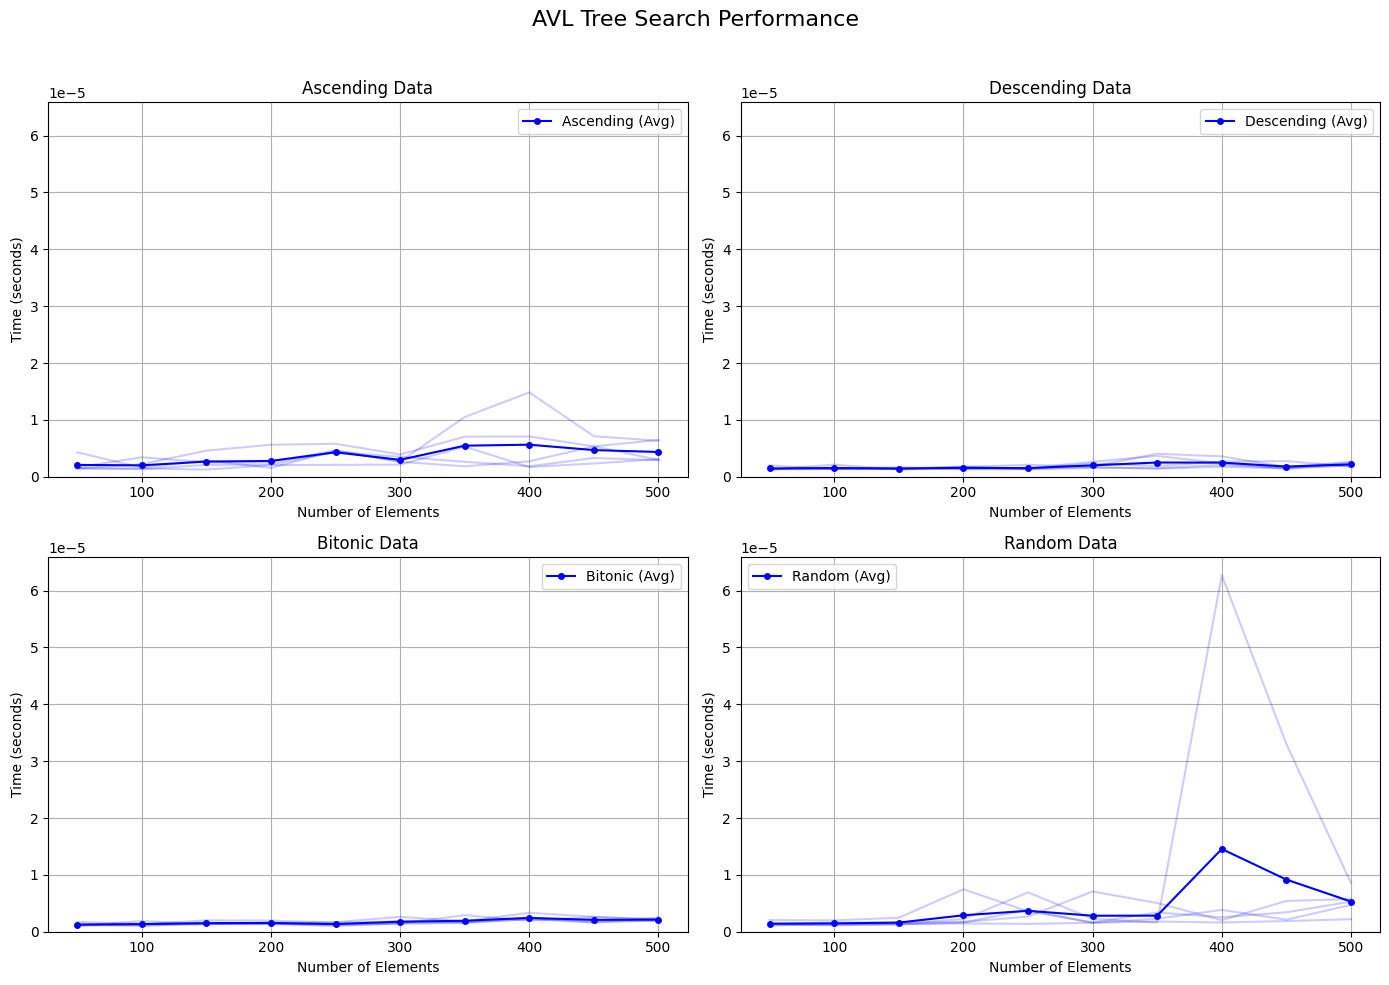

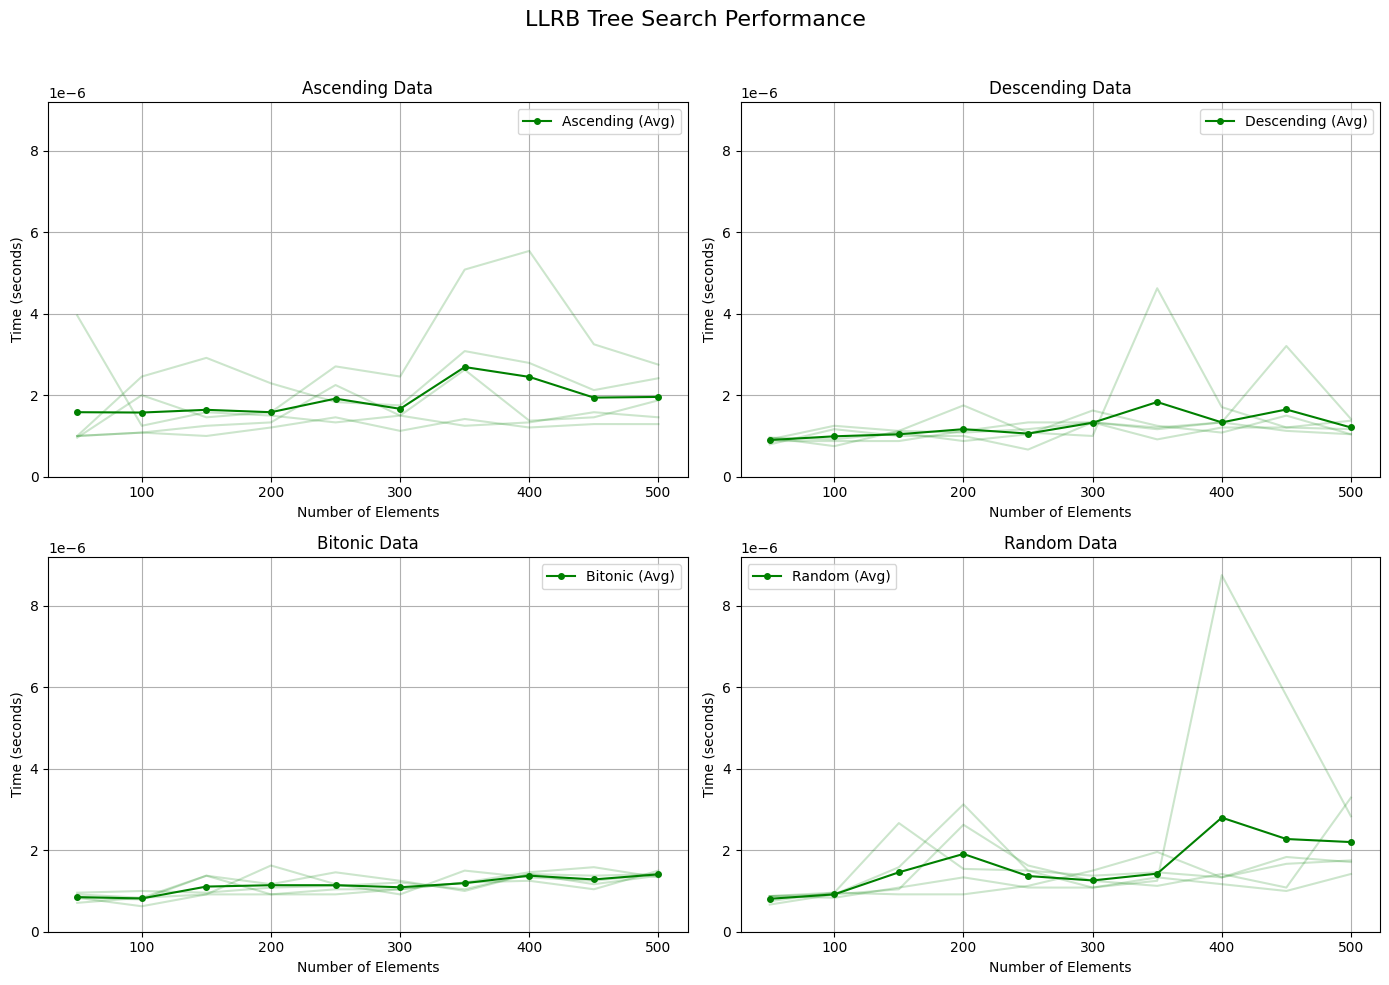

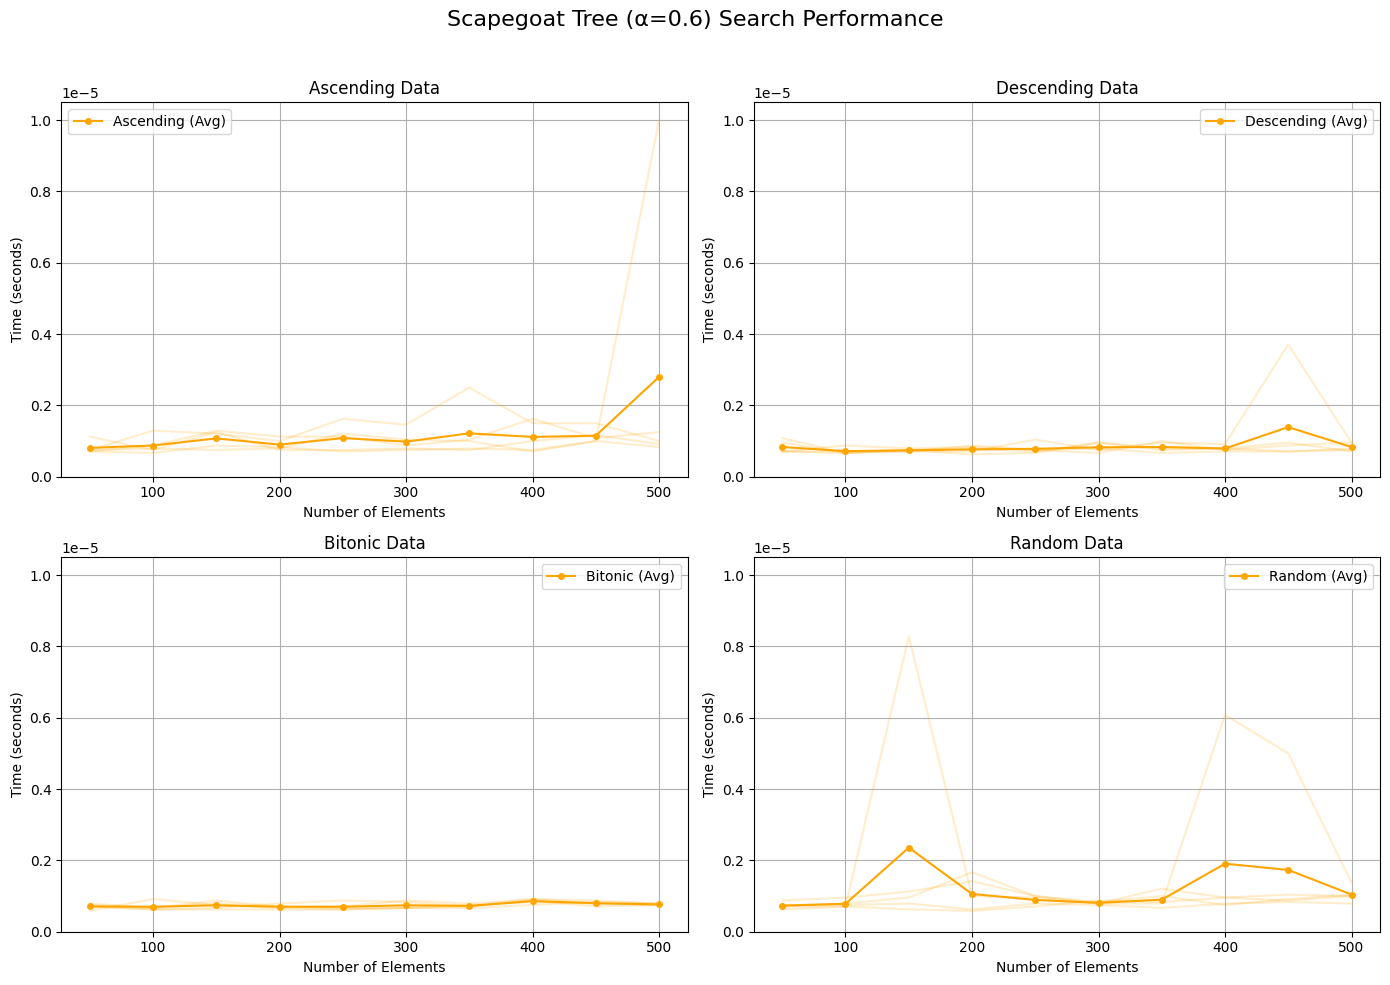

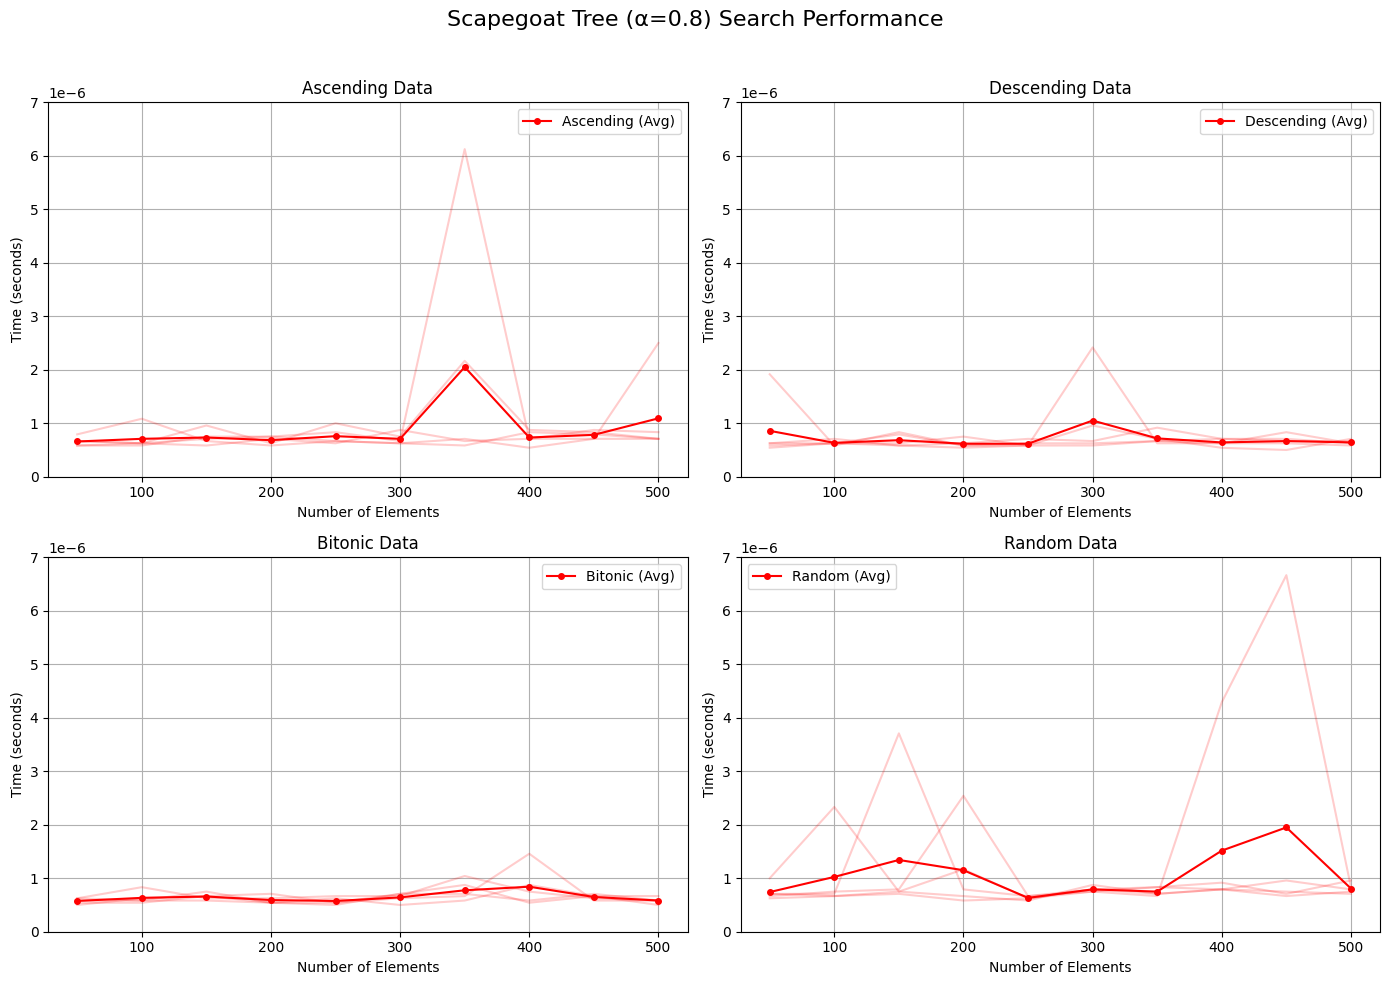

/var/folders/g6/83vrkm355wl5jwtst6s3t2600000gn/T/ipykernel_98097/3260791226.py:344: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[row][col].set_ylim(0, y_max)


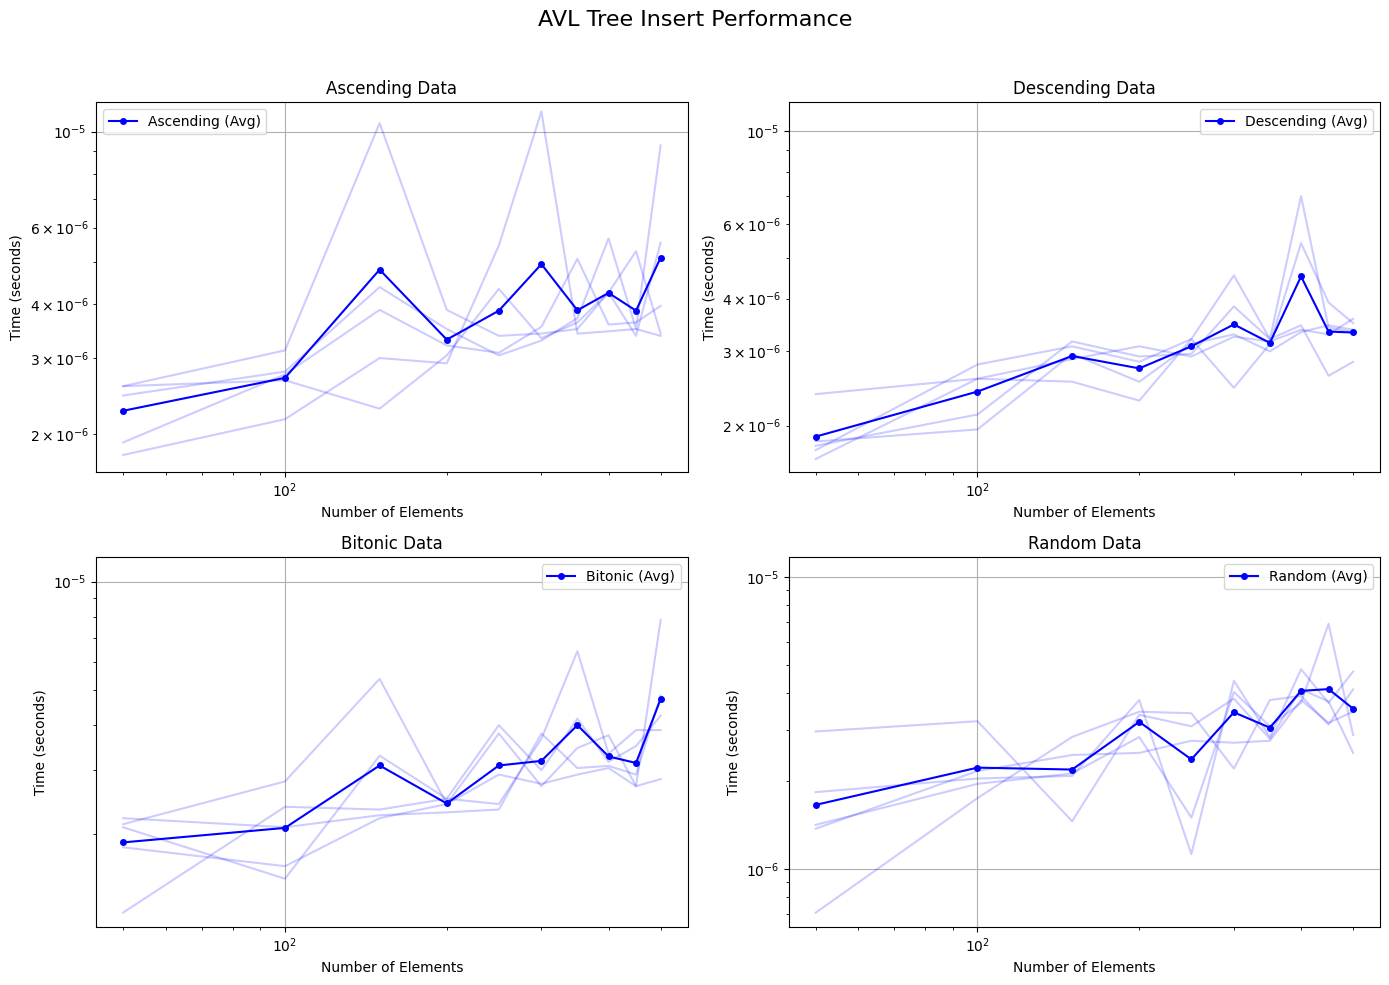

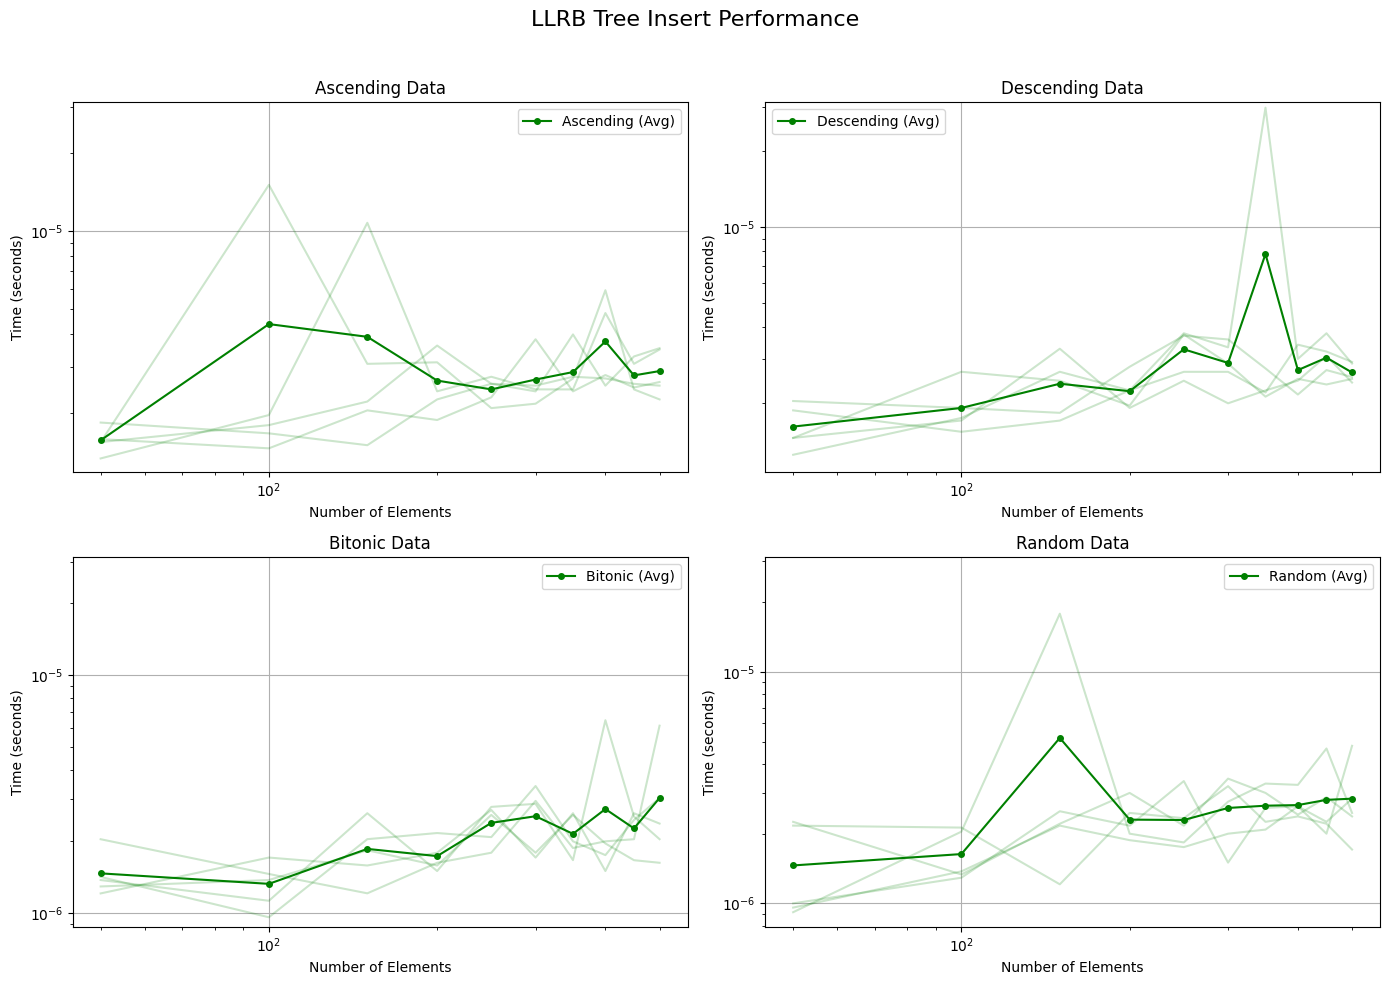

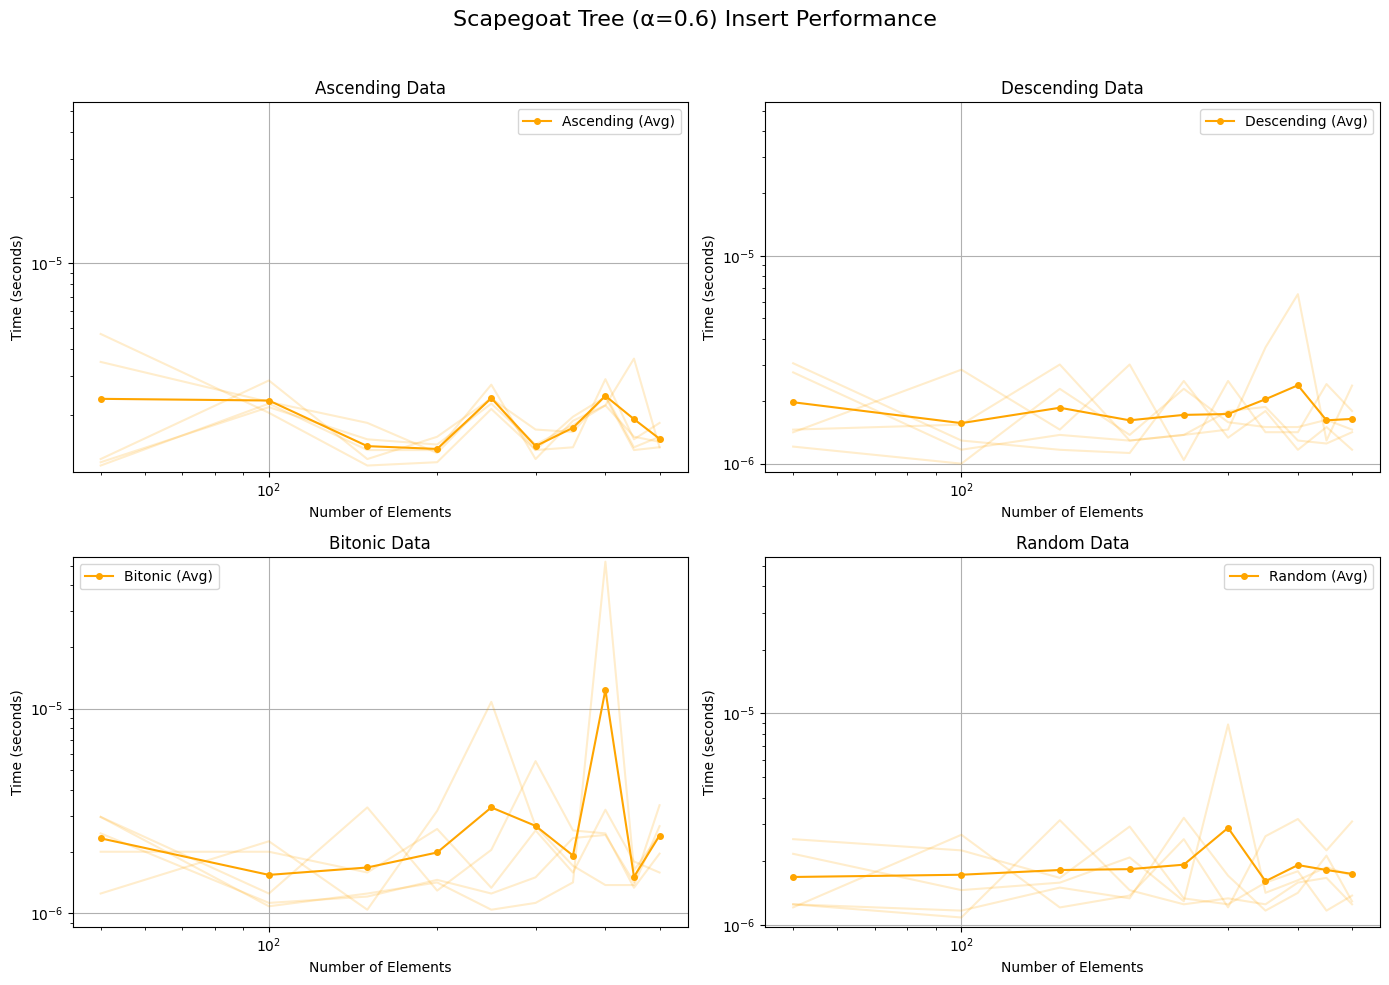

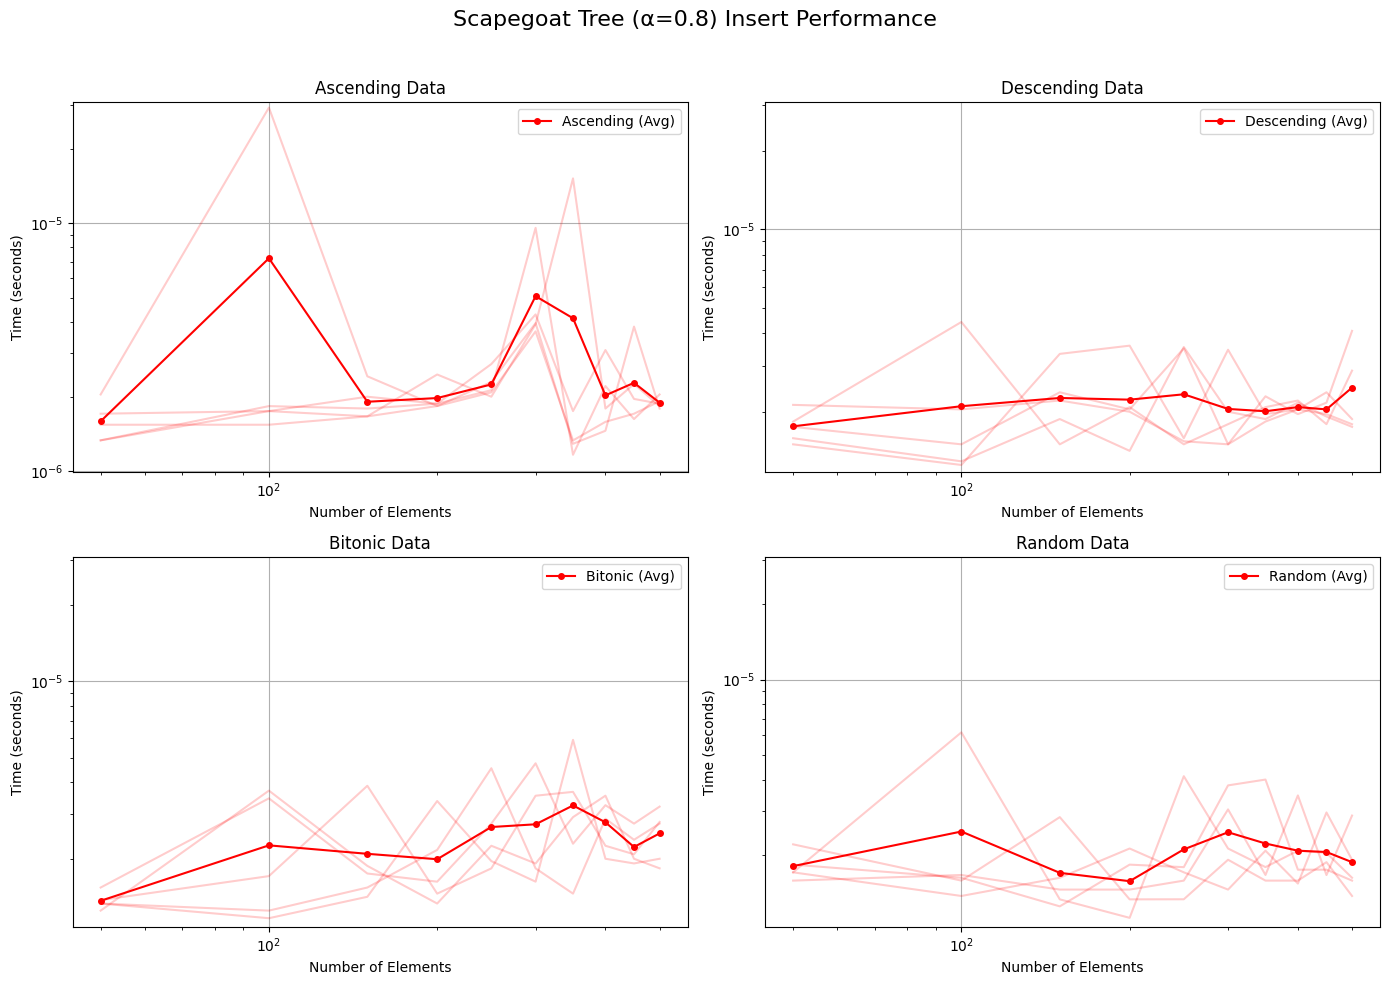

In [ ]:
import matplotlib.pyplot as plt
dataGen = TestDataGenerator()
framework = ExperimentalFramework()

biggestTestSize=5000
interval = 50
sizeOfTests = [i for i in range(biggestTestSize+1) if (i % interval == 0) and (i != 0)]

amountOfTests = 5

# Dictionary of data generation methods for different data patterns
data_generators = {
    "ascending": dataGen.generateAscending,
    "descending": dataGen.generateDescending,
    "bitonic": dataGen.generateBitonic,
    "random": dataGen.generateRandom
}

amountOfRuns = 4 * amountOfTests * 4
#trees * tests * datasets

runNumber = 0



import timeit

def time_search(tree, test_data):
    framework = ExperimentalFramework()
    framework.testSearch(test_data, tree)

def testSearches():
    # Prepare a results dictionary to hold search times for each data pattern
    all_outcomes = {
        "ascending": [],
        "descending": [],
        "bitonic": [],
        "random": []
    }

    # Run tests for each data pattern
    for data_pattern, generator in data_generators.items():
        AVLoutComes = []
        LLRBoutComes = []
        scapegoat1outComes = []
        scapegoat2outComes = []
        

        for test in range(amountOfTests):
            AVLtestResult = []
            LLRBtestResult = []
            scapegoat1testResult = []
            scapegoat2testResult = []

            for size in sizeOfTests:
                # Generate data using the current pattern's generator
                (searchData, ext) = generator(size)
                searchData.append(ext)

                # Preload the trees with the same data
                AVL = AVLTree()
                framework.instantiateTree(searchData, AVL)
                LLRB = LLRBBST()
                framework.instantiateTree(searchData, LLRB)
                scapegoat1 = ScapegoatTree(0.6)
                framework.instantiateTree(searchData, scapegoat1)
                scapegoat2 = ScapegoatTree(0.8)
                framework.instantiateTree(searchData, scapegoat2)

                # Measure search time for AVL Tree
                AVLSearchTime = timeit.timeit(
                    stmt="time_search(AVL, searchData)",
                    globals={"searchData": searchData, "time_search": time_search, "AVL": AVL},
                    number=1
                )
                AVLtestResult.append(AVLSearchTime)

                # Measure search time for LLRB Tree
                LLRBSearchTime = timeit.timeit(
                    stmt="time_search(LLRB, searchData)",
                    globals={"searchData": searchData, "time_search": time_search, "LLRB": LLRB},
                    number=1
                )
                LLRBtestResult.append(LLRBSearchTime)

                # Measure search time for Scapegoat Tree (alpha = 0.6)
                scapegoat1SearchTime = timeit.timeit(
                    stmt="time_search(scapegoat1, searchData)",
                    globals={"searchData": searchData, "time_search": time_search, "scapegoat1": scapegoat1},
                    number=1
                )
                scapegoat1testResult.append(scapegoat1SearchTime)

                # Measure search time for Scapegoat Tree (alpha = 0.8)
                scapegoat2SearchTime = timeit.timeit(
                    stmt="time_search(scapegoat2, searchData)",
                    globals={"searchData": searchData, "time_search": time_search, "scapegoat2": scapegoat2},
                    number=1
                )
                scapegoat2testResult.append(scapegoat2SearchTime)

            # Collect results for each iteration
            AVLoutComes.append(AVLtestResult)
            LLRBoutComes.append(LLRBtestResult)
            scapegoat1outComes.append(scapegoat1testResult)
            scapegoat2outComes.append(scapegoat2testResult)

        # Store the final outcomes in all_outcomes under the current data pattern
        all_outcomes[data_pattern] = [
            AVLoutComes,
            LLRBoutComes,
            scapegoat1outComes,
            scapegoat2outComes
        ]

    return all_outcomes

def testInserts():

    # Prepare a results dictionary to hold insertion times for each data pattern
    all_outcomes = {
        "ascending": [],
        "descending": [],
        "bitonic": [],
        "random": []
    }

    # Run tests for each data pattern
    for data_pattern, generator in data_generators.items():
        AVLoutComes = []
        LLRBoutComes = []
        scapegoat1outComes = []
        scapegoat2outComes = []

        for test in range(amountOfTests):
            AVLtestResult = []
            LLRBtestResult = []
            scapegoat1testResult = []
            scapegoat2testResult = []

            for size in sizeOfTests:
                # Generate data using the current pattern's generator
                (insertData, extraWord) = generator(size)

                # Measure insertion time for AVL Tree
                AVL = AVLTree()
                framework.instantiateTree(insertData, AVL)
                AVLInsertTime = timeit.timeit(
                    stmt="framework.testInsert(extraWord, AVL)",
                    globals={"extraWord": extraWord, "framework": framework, "AVL": AVL},
                    number=1
                )
                AVLtestResult.append(AVLInsertTime)

                # Measure insertion time for LLRB Tree
                LLRB = LLRBBST()
                framework.instantiateTree(insertData, LLRB)
                LLRBInsertTime = timeit.timeit(
                    stmt="framework.testInsert(extraWord, LLRB)",
                    globals={"extraWord": extraWord, "framework": framework, "LLRB": LLRB},
                    number=1
                )
                LLRBtestResult.append(LLRBInsertTime)

                # Measure insertion time for Scapegoat Tree (alpha = 0.6)
                scapegoat1 = ScapegoatTree(0.6)
                framework.instantiateTree(insertData, scapegoat1)
                scapegoat1InsertTime = timeit.timeit(
                    stmt="framework.testInsert(extraWord, scapegoat1)",
                    globals={"extraWord": extraWord, "framework": framework, "scapegoat1": scapegoat1},
                    number=1
                )
                scapegoat1testResult.append(scapegoat1InsertTime)

                # Measure insertion time for Scapegoat Tree (alpha = 0.8)
                scapegoat2 = ScapegoatTree(0.8)
                framework.instantiateTree(insertData, scapegoat2)
                scapegoat2InsertTime = timeit.timeit(
                    stmt="framework.testInsert(extraWord, scapegoat2)",
                    globals={"extraWord": extraWord, "framework": framework, "scapegoat2": scapegoat2},
                    number=1
                )
                scapegoat2testResult.append(scapegoat2InsertTime)

            # Collect results for each iteration
            AVLoutComes.append(AVLtestResult)
            LLRBoutComes.append(LLRBtestResult)
            scapegoat1outComes.append(scapegoat1testResult)
            scapegoat2outComes.append(scapegoat2testResult)

        # Store the final outcomes in all_outcomes under the current data pattern
        all_outcomes[data_pattern] = [
            AVLoutComes,
            LLRBoutComes,
            scapegoat1outComes,
            scapegoat2outComes
        ]

    return all_outcomes

searchOutcomes = testSearches()
ascendingSearchOutcomes = searchOutcomes["ascending"]
descendingSearchOutcomes = searchOutcomes["descending"]
bitonicSearchOutcomes = searchOutcomes["bitonic"]
randomSearchOutComes = searchOutcomes["random"]

insertOutcomes = testInserts()
ascendingOutcomes = insertOutcomes["ascending"]
descendingOutcomes = insertOutcomes["descending"]
bitonicOutcomes = insertOutcomes["bitonic"]
randomOutcomes = insertOutcomes["random"]

# Extract outcomes for each tree type for the "random" data pattern as an example
AVLInsertOutComes = randomOutcomes[0]
LLRBInsertOutComes = randomOutcomes[1]
scapegoat1InsertOutComes = randomOutcomes[2]
scapegoat2InsertOutComes = randomOutcomes[3]




# Average the outcomes across all tests
def average_outcomes(outcomes):
    return [sum(test_results) / len(test_results) for test_results in zip(*outcomes)]

# Define x-axis values (test sizes)
x_values = sizeOfTests

# Patterns to plot
patterns = ["ascending", "descending", "bitonic", "random"]


# Trees to plot
trees = {
    "AVL Tree": 0,
    "LLRB Tree": 1,
    "Scapegoat Tree (α=0.6)": 2,
    "Scapegoat Tree (α=0.8)": 3
}

# Define consistent colors for each tree
tree_colors = {
    "AVL Tree": "blue",
    "LLRB Tree": "green",
    "Scapegoat Tree (α=0.6)": "orange",
    "Scapegoat Tree (α=0.8)": "red"
}

# Plot each tree's performance on different datasets
for tree_name, tree_index in trees.items():
    # Create a new figure for this tree
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"{tree_name} Search Performance", fontsize=16)

    # Store the maximum value for normalization
    max_value = 0

    # First pass: Find the maximum value across all subplots
    for i, pattern in enumerate(patterns):
        outcomes = searchOutcomes[pattern][tree_index]  # Get outcomes for this tree and pattern
        avg_outcomes = average_outcomes(outcomes)  # Calculate average outcomes

        # Update the maximum value (consider both individual trials and averages)
        max_value = max(max_value, max(max(trial) for trial in outcomes), max(avg_outcomes))

    # Add 5% margin to the maximum value
    y_max = max_value * 1.05

    # Second pass: Plot the data and normalize the y-axes
    for i, pattern in enumerate(patterns):
        row, col = divmod(i, 2)  # Determine subplot position (2x2 grid)
        outcomes = searchOutcomes[pattern][tree_index]  # Get outcomes for this tree and pattern
        avg_outcomes = average_outcomes(outcomes)  # Calculate average outcomes

        # Use the consistent color for this tree
        color = tree_colors[tree_name]

        # Plot individual trials with faint lines
        for trial in outcomes:
            axs[row][col].plot(x_values, trial, color=color, alpha=0.2)  # Faint lines for individual trials

        # Plot average outcomes with solid lines
        axs[row][col].plot(x_values, avg_outcomes, label=f"{pattern.capitalize()} (Avg)", color=color, marker='o', markersize=4)

        # Add labels, title, and grid
        axs[row][col].set_title(f"{pattern.capitalize()} Data")
        axs[row][col].set_xlabel("Number of Elements")
        axs[row][col].set_ylabel("Time (seconds)")
        axs[row][col].grid()
        axs[row][col].legend()

        # Set the y-axis limit
        axs[row][col].set_ylim(0, y_max)

    # Adjust layout and show the figure
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
    plt.show()

for tree_name, tree_index in trees.items():
    # Create a new figure for this tree
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"{tree_name} Insert Performance", fontsize=16)

    # Store the maximum value for normalization
    max_value = 0

    # First pass: Find the maximum value across all subplots
    for i, pattern in enumerate(patterns):
        outcomes = insertOutcomes[pattern][tree_index]  # Get outcomes for this tree and pattern
        avg_outcomes = average_outcomes(outcomes)  # Calculate average outcomes

        # Update the maximum value (consider both individual trials and averages)
        max_value = max(max_value, max(max(trial) for trial in outcomes), max(avg_outcomes))

    # Add 5% margin to the maximum value
    y_max = max_value * 1.05

    # Second pass: Plot the data and normalize the y-axes
    for i, pattern in enumerate(patterns):
        row, col = divmod(i, 2)  # Determine subplot position (2x2 grid)
        outcomes = insertOutcomes[pattern][tree_index]  # Get outcomes for this tree and pattern
        avg_outcomes = average_outcomes(outcomes)  # Calculate average outcomes

        # Use the consistent color for this tree
        color = tree_colors[tree_name]

        # Plot individual trials with faint lines
        for trial in outcomes:
            axs[row][col].plot(x_values, trial, color=color, alpha=0.2)  # Faint lines for individual trials

        # Plot average outcomes with solid lines
        axs[row][col].plot(x_values, avg_outcomes, label=f"{pattern.capitalize()} (Avg)", color=color, marker='o', markersize=4)

        # Add labels, title, and grid
        axs[row][col].set_title(f"{pattern.capitalize()} Data")
        axs[row][col].set_xlabel("Number of Elements")
        axs[row][col].set_ylabel("Time (seconds)")
        axs[row][col].set_xscale('log')
        axs[row][col].set_yscale('log')
        axs[row][col].grid()
        axs[row][col].legend()

        # Set the y-axis limit
        axs[row][col].set_ylim(0, y_max)

    # Adjust layout and show the figure
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
    plt.show()
            